In [41]:
from scipy.cluster.hierarchy import linkage,dendrogram

from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<h1 style = 'color: orange'>Hierarcal CLustering</h1>

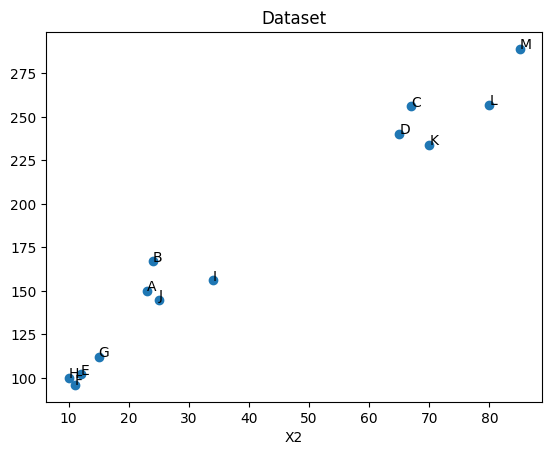

In [2]:
df = pd.read_csv('../Datasets/simp_clust.csv',index_col=0)
df

plt.scatter(df['X1'],df['X2'])
for i in range(df.shape[0]):
    plt.text(x = df['X1'].values[i], y =df['X2'].values[i],s = list(df.index)[i])
plt.title("Dataset")
plt.xlabel('X1')
plt.xlabel('X2')

plt.show()


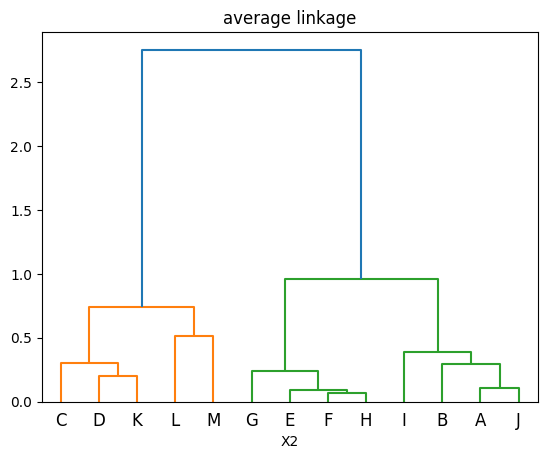

In [3]:
#Average Linkage
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)
link = 'average'
merging = linkage(df_scaled,method = link)  #defining merging way
dendrogram(merging,labels = list(df_scaled.index)) #plots dendogram
plt.title(link + " linkage") 

plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

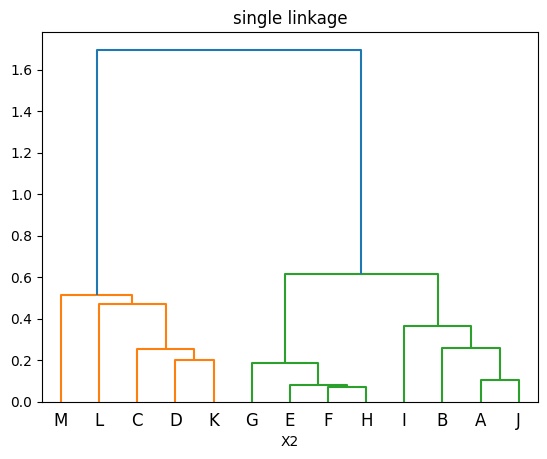

In [4]:
#Single Linkage
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)
link = 'single'
merging = linkage(df_scaled,method = link)
dendrogram(merging,labels = list(df_scaled.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

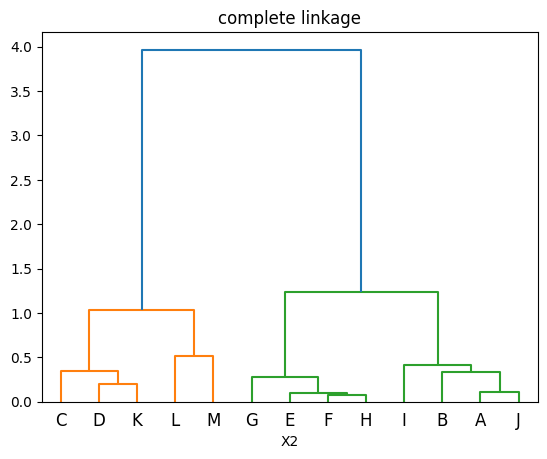

In [5]:
#Complete Linkage
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)
link = 'complete'
merging = linkage(df_scaled,method = link)
dendrogram(merging,labels = list(df_scaled.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

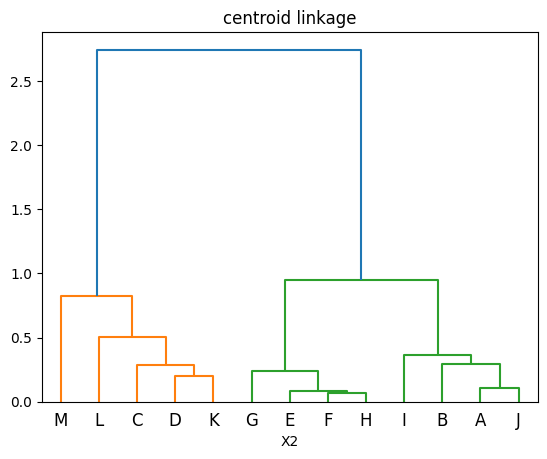

In [6]:
#Centroid Linkage
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)
link = 'centroid'
merging = linkage(df_scaled,method = link)
dendrogram(merging,labels = list(df_scaled.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

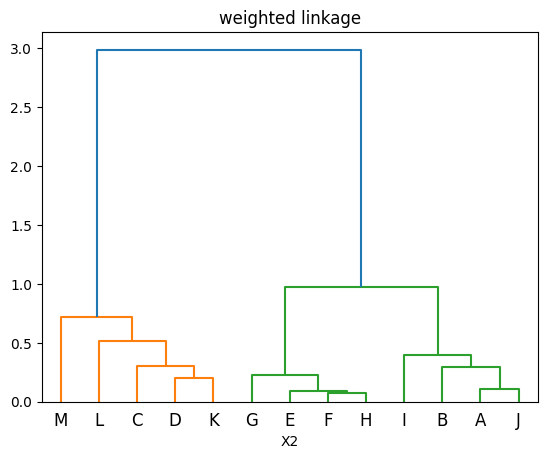

In [7]:
#Weighted Linkage
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)
link = 'weighted'
merging = linkage(df_scaled,method = link)
dendrogram(merging,labels = list(df_scaled.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

<h1 style = 'color:orange'>Sklearn For Clustering</h1>

In [8]:
df = pd.read_csv('../Datasets/simp_clust.csv',index_col=0)

scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled) #clustering scaled df
print(clust.labels_) # lables proived to each members 

df_copy = df.copy()
df_copy['label'] = clust.labels_
print(silhouette_score(df_scaled,clust.labels_))
df_copy.sort_values('label')


[1 1 0 0 2 2 2 2 1 1 0 0 0]
0.748692102698497


,X1,X2,label
Name,,,
D,65,240,0
C,67,256,0
K,70,234,0
L,80,257,0
M,85,289,0
J,25,145,1
B,24,167,1
A,23,150,1
I,34,156,1


In [9]:
#for different types of clinkage and number of clusters

scores = []
linkage = ['ward','single','complete','average']
for l in linkage:    
    for i in range(2, 10):
        cluster = AgglomerativeClustering(n_clusters=i,linkage=l)
        cluster.fit(df_scaled)
        scores.append([l,i, silhouette_score(df_scaled, cluster.labels_)])

scores = pd.DataFrame(scores, columns=['linkage','n_clusters', 'score'])
scores = scores.sort_values('score', ascending=False)
scores

,linkage,n_clusters,score
0,ward,2,0.768625
8,single,2,0.768625
24,average,2,0.768625
16,complete,2,0.768625
17,complete,3,0.748692
25,average,3,0.748692
9,single,3,0.748692
1,ward,3,0.748692
2,ward,4,0.642185
18,complete,4,0.642185


<h1 style = 'color:orange'>Milk Dataset</h1>

In [25]:
milk = pd.read_csv('../Datasets/milk.csv', index_col='Animal')
scalar = StandardScaler().set_output(transform='pandas')
milk_scaled = scalar.fit_transform(milk)

scores = []
linkage = ['ward','single','complete','average']
for l in linkage:
    for n in range(2, 21):
        cluster = AgglomerativeClustering(n_clusters=n, linkage=l)
        cluster.fit(milk_scaled)
        scores.append([l, n, silhouette_score(milk_scaled, cluster.labels_)])

scores = pd.DataFrame(scores, columns=['linkage', 'n_clusters', 'score'])
scores = scores.sort_values('score', ascending=False)
scores

,linkage,n_clusters,score
1,ward,3,0.539160
0,ward,2,0.525851
57,average,2,0.518685
19,single,2,0.518685
39,complete,3,0.487576
...,...,...,...
75,average,20,0.158167
26,single,9,0.102480
21,single,4,0.061485
22,single,5,0.001397


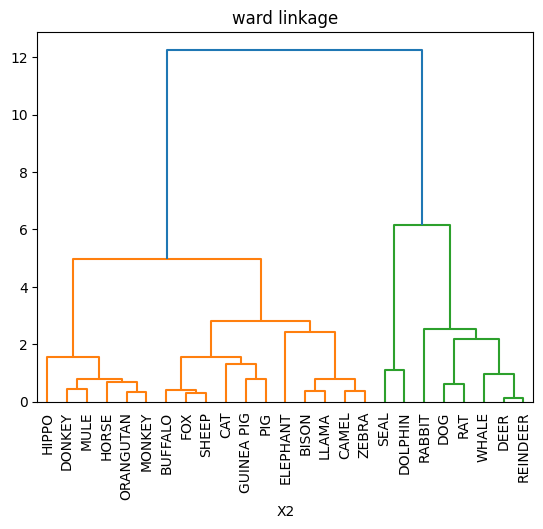

In [29]:
link = 'ward'
merging = linkage(milk_scaled, method=link)
dendrogram(merging,labels = list(milk_scaled.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.xticks(rotation = 90)
plt.show()

<h1 style = 'color:orange'>Nutrient</h1>

In [36]:
nut = pd.read_csv('../Datasets/nutrient.csv',index_col='Food_Item')

scaler = StandardScaler().set_output(transform = 'pandas')
nut_scale = scaler.fit_transform(nut)
linkage = ['ward','complete','single','average']
score = []

for l in linkage:
    for n in range(2,15):
        clust = AgglomerativeClustering(n_clusters=n,linkage=l)
        clust.fit(nut_scale)
        score.append([l,n,silhouette_score(nut_scale,clust.labels_)])
score = pd.DataFrame(score, columns=['Linkage','Clusters','Score'])
score.sort_values('Score',ascending=False)

,Linkage,Clusters,Score
26,single,2,0.448342
27,single,3,0.445319
40,average,3,0.445319
11,ward,13,0.439462
24,complete,13,0.439462
50,average,13,0.439462
15,complete,4,0.415801
2,ward,4,0.415801
39,average,2,0.413451
49,average,12,0.408270


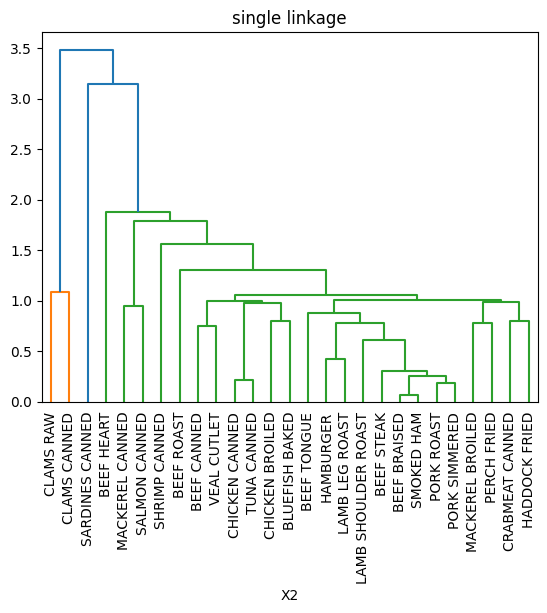

In [40]:
link = 'single'
merging = linkage(nut_scale, method=link)
dendrogram(merging,labels = list(nut_scale.index))
plt.title(link + " linkage")

plt.xlabel('X1')
plt.xlabel('X2')
plt.xticks(rotation = 90)
plt.show()